# Reto - Titanic: Machine Learning from Disaster

---

### Lautaro Gabriel Coteja - A01571214
### Daniela Jiménez Téllez - A01654798
### Andrés Villarreal González - A00833915
### Héctor Hibran Tapia Fernández - A01661114

---

Link del repositorio:

https://github.com/Lautaro000/Inteligencia-Artificial-Avanzada-para-la-Ciencia-de-Datos-I

---

## Importación de librerias

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

plt.style.use("dark_background")

## Importación de datos

In [54]:
df_train_cleaned = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/train_cleaned.csv")

df_test_cleaned = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/test_cleaned.csv")

In [55]:
df_train_cleaned

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_2letter,Ticket_len,Tam_Fam,Tipo_Fam
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,Mr,A/,9,2,1
1,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,Mr,37,6,1,0
2,0,3,"Moran, Mr. James",1,44.5,0,0,330877,8.4583,0,2,Mr,33,6,1,0
3,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,5,0,Mr,17,5,1,0
4,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,0,0,Mr,A/,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,"Brewe, Dr. Arthur Jackson",1,42.0,0,0,112379,39.6000,0,1,Ra,11,6,1,0
887,1,1,"Leader, Dr. Alice (Farnham)",0,49.0,0,0,17465,25.9292,4,0,Ra,17,5,1,0
888,0,1,"Reuchlin, Jonkheer. John George",1,38.0,0,0,19972,0.0000,0,0,Mr,19,5,1,0
889,0,2,"Harper, Rev. John",1,28.0,0,1,248727,33.0000,0,0,Mr,24,6,2,1


In [56]:
df_test_cleaned

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_2letter,Ticket_len,Tam_Fam,Tipo_Fam
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2,Mr,33,6,1,0
1,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2,Mr,24,6,1,0
2,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,Mr,31,6,1,0
3,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,0,Mr,75,4,1,0
4,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,0,Mr,24,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1041,2,"Lahtinen, Rev. William",1,30.0,1,1,250651,26.0000,0,0,Mr,25,6,3,1
414,1056,2,"Peruschitz, Rev. Joseph Maria",1,41.0,0,0,237393,13.0000,0,0,Mr,23,6,1,0
415,1094,1,"Astor, Col. John Jacob",1,47.0,1,0,PC 17757,227.5250,3,1,Ra,PC,8,2,1
416,1185,1,"Dodge, Dr. Washington",1,53.0,1,1,33638,81.8583,1,0,Ra,33,5,3,1


---

# **Regresión Logística**

---

In [57]:
# Caracteristicas y variable objetivo

y = df_train_cleaned['Survived']
features = ['Pclass','Title','Embarked','Tipo_Fam','Ticket_len','Ticket_2letter']
X = df_train_cleaned[features]

In [58]:
# Características y variable objetivo

y = df_train_cleaned['Survived']
features = ['Pclass', 'Title', 'Embarked', 'Tipo_Fam', 'Ticket_len', 'Ticket_2letter']
X = df_train_cleaned[features]

# Dividimos los datos en entrenamiento y validación (70% entrenamiento, 30% validación)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Procesador para transformar las variables

# Aquí agrego un SimpleImputer para valores numéricos (si es necesario) y con OneHotEncoder para categóricas
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), features)
])

# Definimos el modelo de regresión logística con los hiperparámetros proporcionados
modelo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        C=100,                      # Hiperparámetro C ajustado
        class_weight=None,          # Sin balanceo de clases 
        penalty='l2',               # Penalización L1
        solver='newton-cg'))])

# Entrenamiento del modelo

modelo.fit(X_train, y_train)

# Predicciones en el conjunto de validación

y_pred = modelo.predict(X_val)

# Calculamos el accuracy score

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score:", accuracy)

# Sacamos el classification report

report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)


Accuracy Score: 0.8246268656716418
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       175
           1       0.80      0.66      0.72        93

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



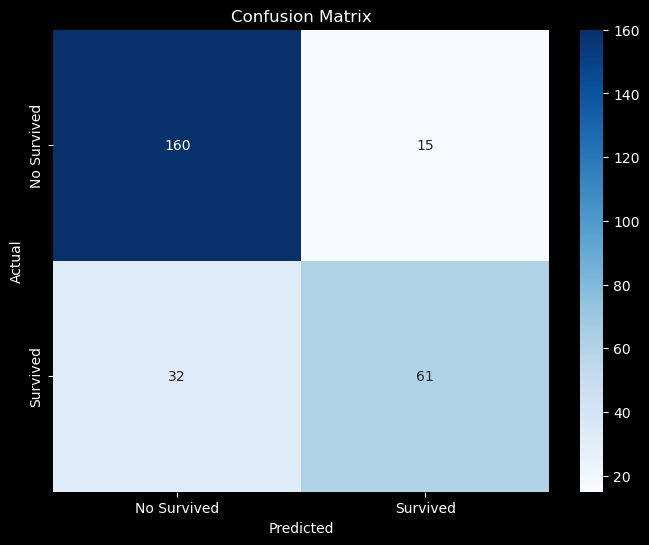

In [59]:
# Calculamos la matriz de confusión

conf_matrix = confusion_matrix(y_val, y_pred)

# Visualizamos la matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


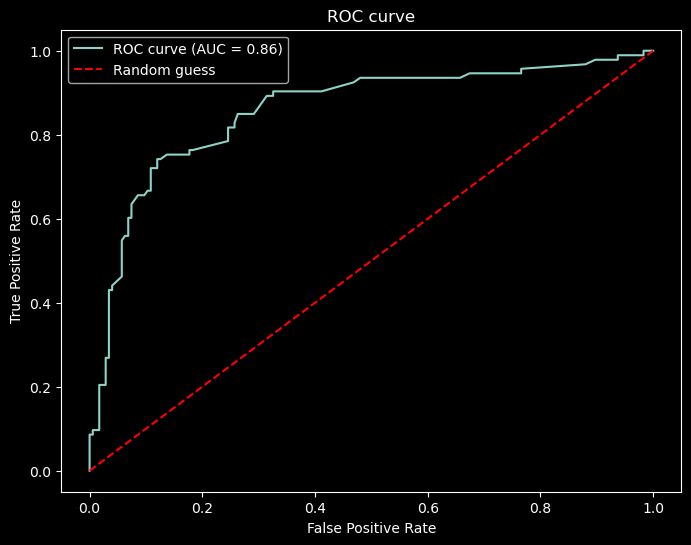

In [60]:
# Obtenemos las probabilidades predichas para la clase positiva

y_pred_proba = modelo.predict_proba(X_val)[:, 1]

# Calculamos la curva ROC y el AUC

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Graficamos la curva ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()


### Comparamos resultados con gender_submission.csv

In [61]:
# Cargamos el archivo 'gender_submission.csv' que contiene los valores reales

gender_submission = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/datasets/submission.csv")

# Creamos un DataFrame con las predicciones del modelo y añadimos 'PassengerId'

X_test = df_test_cleaned[features]

# Obtenemos las predicciones del modelo

predictions = modelo.predict(X_test)

# Creamos un DataFrame con las predicciones

pred_df = pd.DataFrame({
    'PassengerId': df_test_cleaned['PassengerId'],
    'Survived_pred': predictions})

# Unimos las predicciones con los valores reales usando 'PassengerId'

comparison_df = pd.merge(pred_df, gender_submission, on = 'PassengerId')

# Renombramos la columna de 'Survived' en gender_submission a 'Survived_real'

comparison_df = comparison_df.rename(columns = {'Survived': 'Survived_real'})

In [62]:
comparison_df

,PassengerId,Survived_pred,Survived_real
0,892,0,0
1,894,0,0
2,895,0,0
3,897,0,1
4,899,0,1
...,...,...,...
413,1041,0,0
414,1056,0,0
415,1094,0,0
416,1185,1,1


In [63]:
# Calculamos el accuracy (precisión) comparando 'Survived_pred' y 'Survived_real'

accuracy = (comparison_df['Survived_pred'] == comparison_df['Survived_real']).mean()

# Imprimimos el resultado con 4 decimales

print(f"Precisión del modelo en el conjunto de test: {accuracy:.4f}")

Precisión del modelo en el conjunto de test: 0.7799


In [64]:
# Calculamos las predicciones correctas comparando 'Survived_pred' y 'Survived_real'

correct_predictions = (comparison_df['Survived_pred'] == comparison_df['Survived_real']).sum()

# Calculamos el número total de predicciones

total_predictions = len(comparison_df)

# Imprimimos el resultado

print(f"Predicciones correctas: {correct_predictions}/{total_predictions}")

Predicciones correctas: 326/418
